In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from datetime import datetime
%matplotlib inline

In [47]:
df = pd.read_csv('NVDA.csv')
print("First few rows of the dataset:")
display(df.head())

# Convert Date to datetime
df['Date'] = pd.to_datetime(df['Date'])

print("First few rows of the dataset:")
display(df.head())

First few rows of the dataset:


,Date,Adj Close,Close,High,Low,Open,Volume
0,28/11/2022,15.812541,15.827000,16.357000,15.725,16.025999,303741000
1,29/11/2022,15.624713,15.639000,15.932000,15.520,15.827000,298384000
2,30/11/2022,16.911863,16.923000,16.930000,15.597,15.697000,565298000
3,01/12/2022,17.123726,17.135000,17.264999,16.635,16.999001,470977000
4,02/12/2022,16.864895,16.875999,16.933001,16.445,16.659000,371389000


First few rows of the dataset:


C:\Users\R\AppData\Local\Temp\ipykernel_5380\128541.py:6: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'])


,Date,Adj Close,Close,High,Low,Open,Volume
0,2022-11-28,15.812541,15.827000,16.357000,15.725,16.025999,303741000
1,2022-11-29,15.624713,15.639000,15.932000,15.520,15.827000,298384000
2,2022-11-30,16.911863,16.923000,16.930000,15.597,15.697000,565298000
3,2022-12-01,17.123726,17.135000,17.264999,16.635,16.999001,470977000
4,2022-12-02,16.864895,16.875999,16.933001,16.445,16.659000,371389000


In [48]:
# Feature Engineering and Variable Analysis
"""
Create features and analyze dependent/independent variables
"""

df['Prev_Close'] = df['Adj Close'].shift(1)
df['Price_Change'] = df['Adj Close'].pct_change()
df['Volume_Change'] = df['Volume'].pct_change()
df['Price_Range'] = df['High'] - df['Low']
df['MA5'] = df['Adj Close'].rolling(window=5).mean()
df['MA20'] = df['Adj Close'].rolling(window=20).mean()


df = df.dropna()


features = ['Prev_Close', 'Volume_Change', 'Price_Range', 'MA5', 'MA20']

print("\nDependent Variable (Target):")
print("- Adjusted Close Price")
print("\nIndependent Variables (Features):")
for feature in features:
    print(f"- {feature}")

# Basic statistics
print("\nFeature Statistics:")
display(df[features + ['Adj Close']].describe())


Dependent Variable (Target):
- Adjusted Close Price

Independent Variables (Features):
- Prev_Close
- Volume_Change
- Price_Range
- MA5
- MA20

Feature Statistics:


,Prev_Close,Volume_Change,Price_Range,MA5,MA20,Adj Close
count,484.000000,484.000000,484.000000,484.000000,484.000000,484.000000
mean,68.397111,0.037786,2.601826,68.141253,66.166864,68.648332
std,39.660375,0.301342,2.193877,39.531393,38.650718,39.708597
min,14.026766,-0.672406,0.378000,14.328366,15.460720,14.026766
25%,40.796634,-0.157882,1.012001,41.237969,39.008301,40.831032
50%,48.792377,-0.015863,1.764502,48.851154,47.781315,48.846369
75%,105.270994,0.180440,3.547504,106.303406,101.884240,106.263472
max,148.880005,1.228817,13.350006,147.266000,142.878999,148.880005


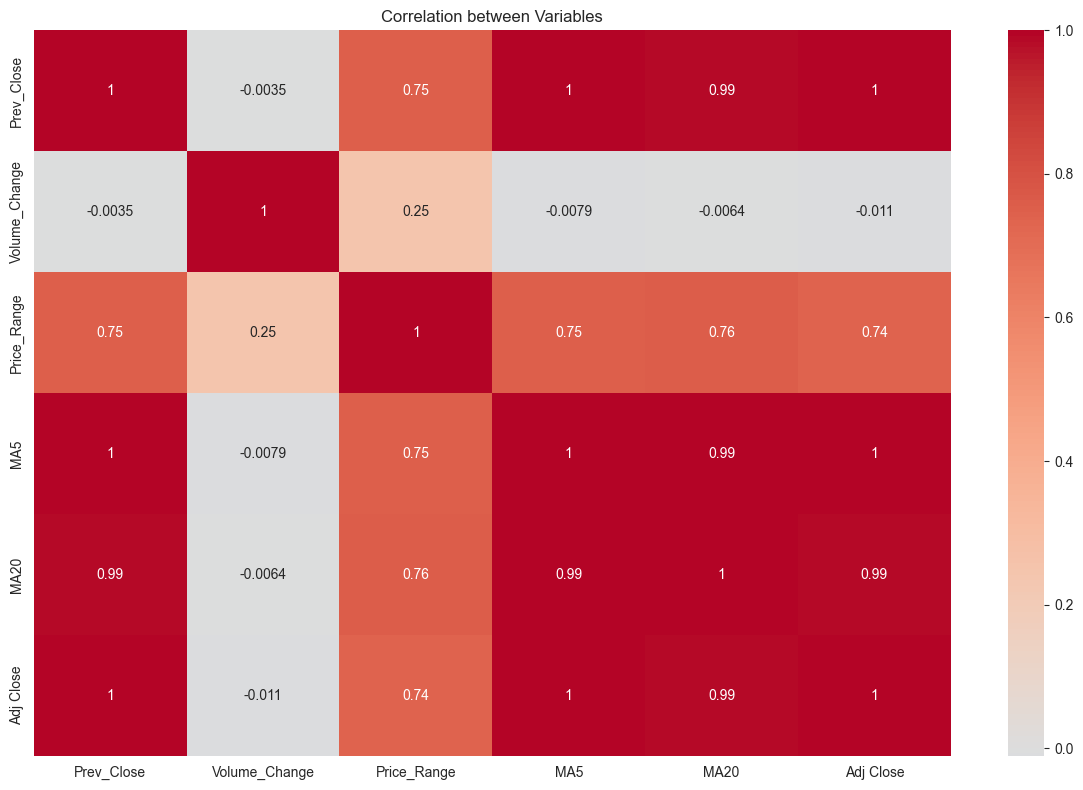

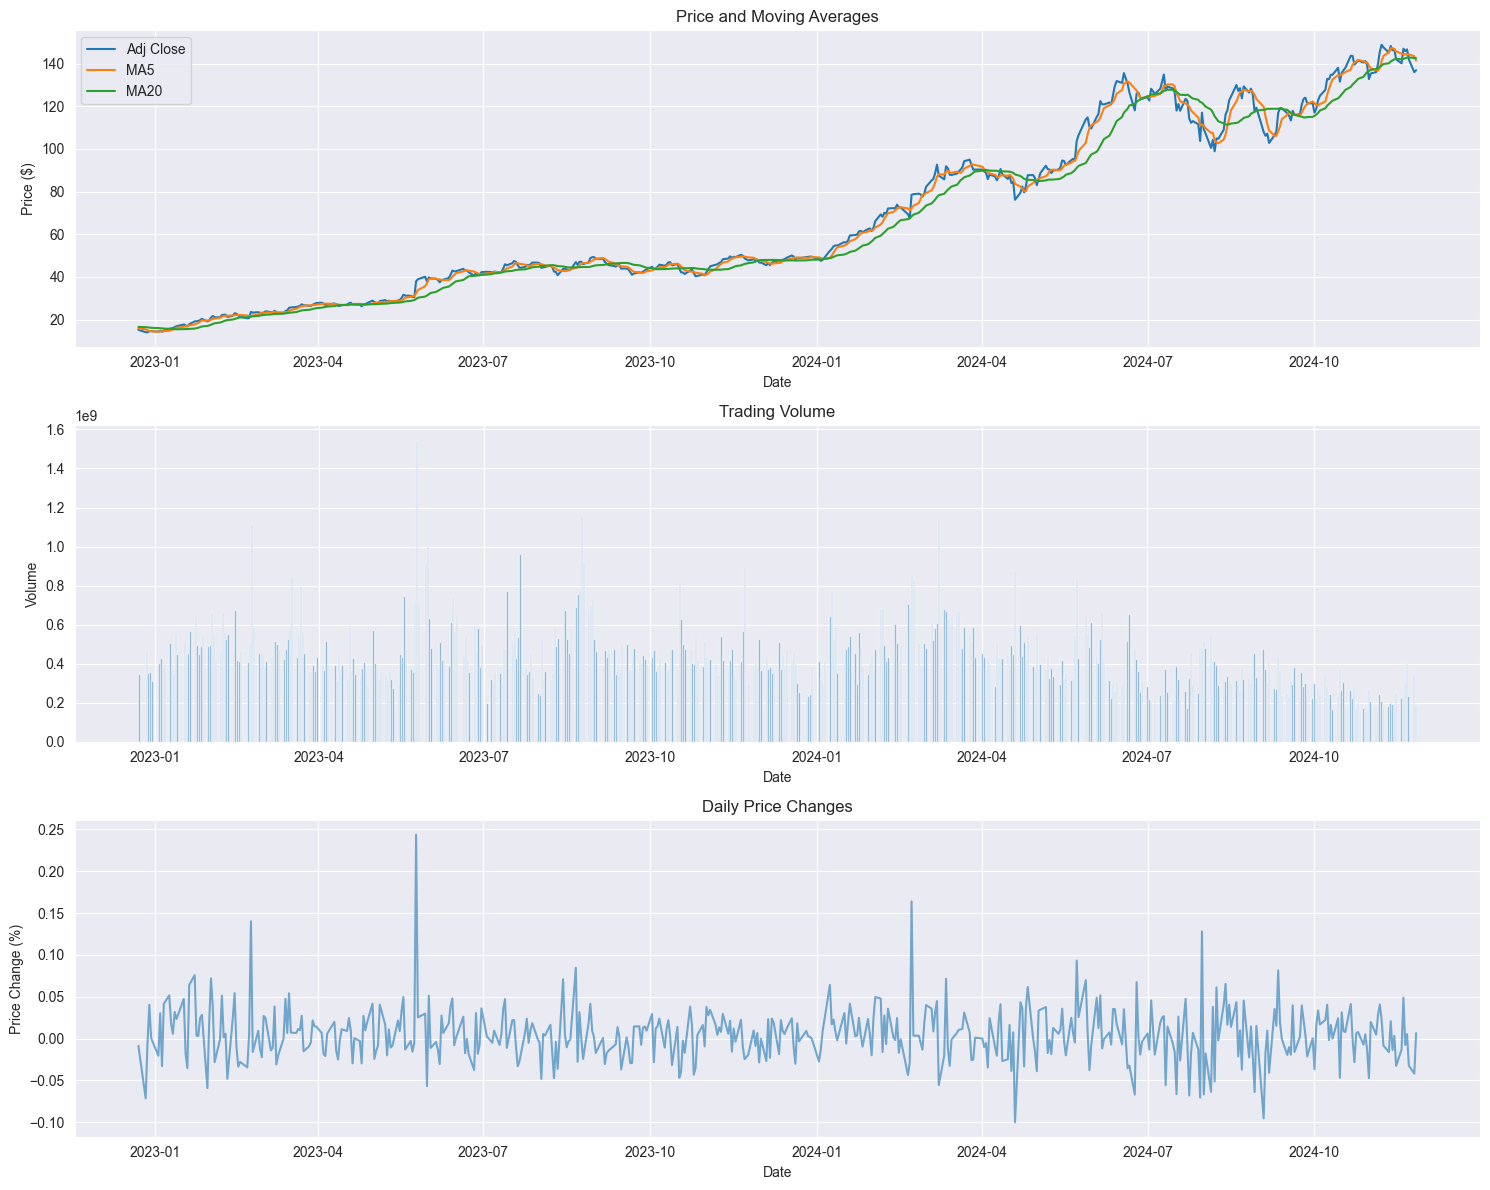

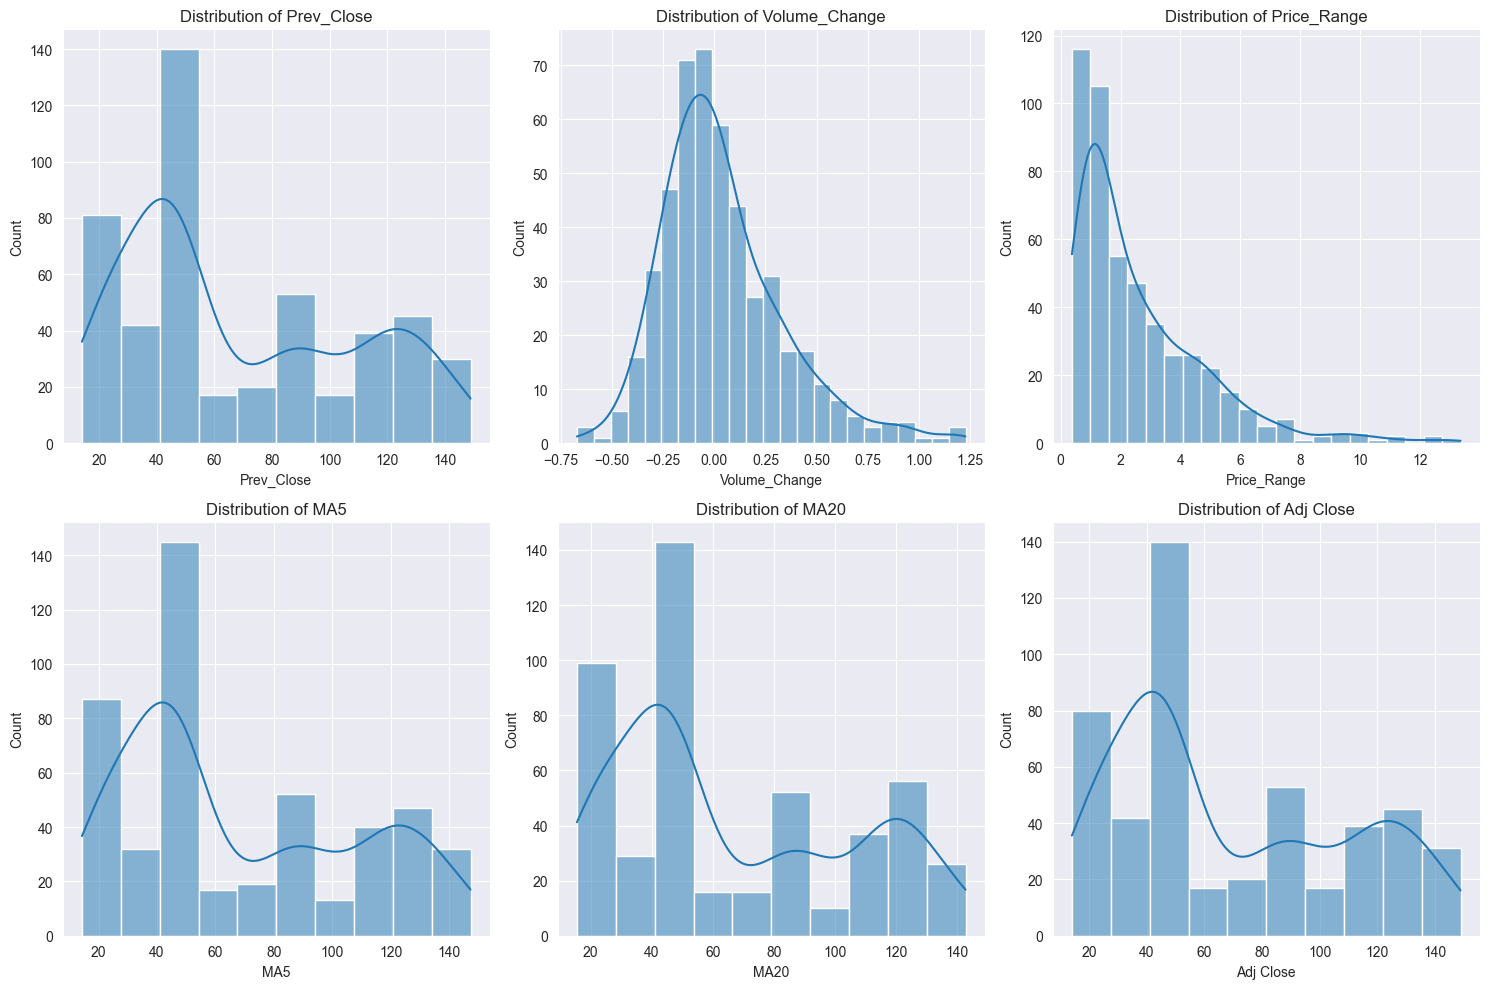

In [49]:
# Visualizations
"""
Comprehensive visualization of all variables and their relationships
"""
# 1. Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df[features + ['Adj Close']].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation between Variables')
plt.tight_layout()
plt.show()

# 2. Time Series Plots
fig, axes = plt.subplots(3, 1, figsize=(15, 12))

# Price and Moving Averages
axes[0].plot(df['Date'], df['Adj Close'], label='Adj Close')
axes[0].plot(df['Date'], df['MA5'], label='MA5')
axes[0].plot(df['Date'], df['MA20'], label='MA20')
axes[0].set_title('Price and Moving Averages')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Price ($)')
axes[0].legend()

# Volume
axes[1].bar(df['Date'], df['Volume'], alpha=0.6)
axes[1].set_title('Trading Volume')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Volume')

# Price Changes
axes[2].plot(df['Date'], df['Price_Change'], alpha=0.6)
axes[2].set_title('Daily Price Changes')
axes[2].set_xlabel('Date')
axes[2].set_ylabel('Price Change (%)')

plt.tight_layout()
plt.show()

# 3. Feature Distributions
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for idx, feature in enumerate(features + ['Adj Close']):
    if idx < len(axes):
        sns.histplot(data=df, x=feature, kde=True, ax=axes[idx])
        axes[idx].set_title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()

In [50]:
# Prepare Data for Modeling
"""
Create features and target variables for prediction
"""
# Features for prediction
features = ['Prev_Close', 'Volume_Change', 'Price_Range']
X = df[features]
y = df['Adj Close']

# Splitting
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=False
)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (387, 3)
Testing set shape: (97, 3)


In [51]:
# Training the Model
"""
Train the linear regression model
"""
model = LinearRegression()
model.fit(X_train, y_train)

# Get model parameters
coefficients = pd.DataFrame({
    'Feature': features,
    'Coefficient': model.coef_
})
print("Model Parameters:")
print("-" * 50)
print(f"Intercept: {model.intercept_:.2f}")
print("\nFeature Coefficients:")
display(coefficients)

Model Parameters:
--------------------------------------------------
Intercept: -0.01

Feature Coefficients:


,Feature,Coefficient
0,Prev_Close,1.016590
1,Volume_Change,0.250479
2,Price_Range,-0.306726


In [52]:
# Make Predictions
"""
Generate predictions and compare with actual values
"""
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Create comparison DataFrame for test set
comparison_df = pd.DataFrame({
    'Date': df.iloc[len(X_train):]['Date'],
    'Actual': y_test,
    'Predicted': y_pred_test,
    'Difference': y_test - y_pred_test
})

print("\nPrediction Comparison (last 5 days):")
display(comparison_df.tail())


Prediction Comparison (last 5 days):


,Date,Actual,Predicted,Difference
498,2024-11-20,145.889999,148.043999,-2.154000
499,2024-11-21,146.669998,144.631351,2.038647
500,2024-11-22,141.949997,147.128109,-5.178112
501,2024-11-25,136.020004,142.495447,-6.475442
502,2024-11-26,136.919998,137.036823,-0.116825


In [53]:
# Evaluate the Model
"""
Calculate performance metrics
"""
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)
train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
train_mae = mean_absolute_error(y_train, y_pred_train)
test_mae = mean_absolute_error(y_test, y_pred_test)

print("Model Performance Metrics:")
print("-" * 50)
print(f"Training R² Score: {train_r2:.4f}")
print(f"Testing R² Score: {test_r2:.4f}")
print(f"Training RMSE: ${train_rmse:.2f}")
print(f"Testing RMSE: ${test_rmse:.2f}")
print(f"Training MAE: ${train_mae:.2f}")
print(f"Testing MAE: ${test_mae:.2f}")

Model Performance Metrics:
--------------------------------------------------
Training R² Score: 0.9959
Testing R² Score: 0.9041
Training RMSE: $1.91
Testing RMSE: $4.12
Training MAE: $1.22
Testing MAE: $3.23


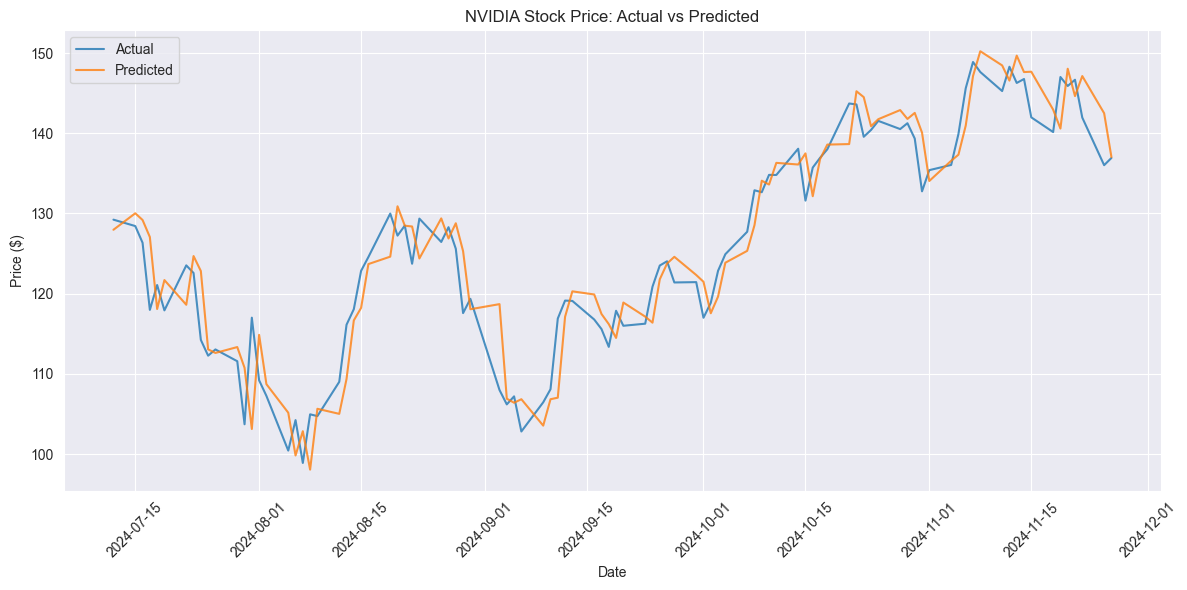

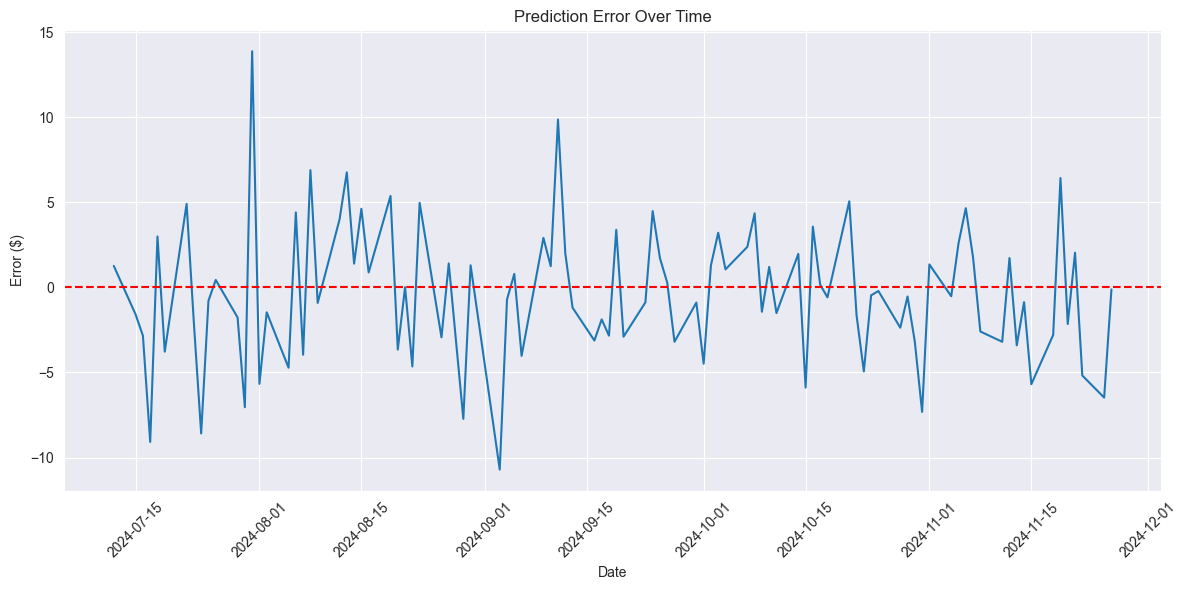

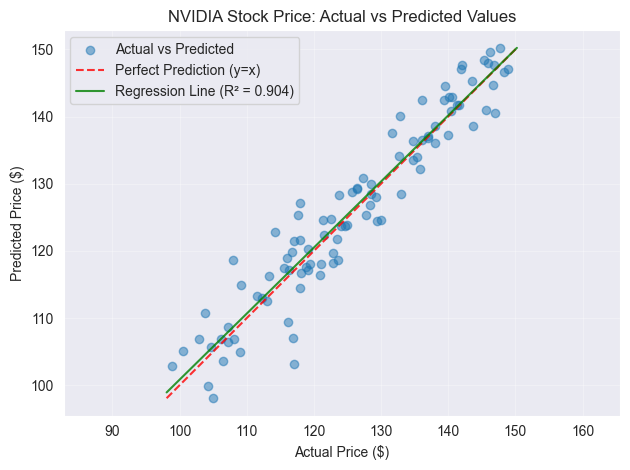

In [54]:
# Visualize Predictions
"""
Plot actual vs predicted prices
"""
plt.figure(figsize=(12, 6))
plt.plot(comparison_df['Date'], comparison_df['Actual'], label='Actual', alpha=0.8)
plt.plot(comparison_df['Date'], comparison_df['Predicted'], label='Predicted', alpha=0.8)
plt.title('NVIDIA Stock Price: Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Prediction Error Over Time
plt.figure(figsize=(12, 6))
plt.plot(comparison_df['Date'], comparison_df['Difference'])
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Prediction Error Over Time')
plt.xlabel('Date')
plt.ylabel('Error ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot the scatter points
plt.scatter(y_test, y_pred_test, alpha=0.5, label='Actual vs Predicted')

# Calculate and plot the perfect prediction line (y=x)
min_val = min(min(y_test), min(y_pred_test))
max_val = max(max(y_test), max(y_pred_test))
perfect_line = np.linspace(min_val, max_val, 100)
plt.plot(perfect_line, perfect_line, 'r--', label='Perfect Prediction (y=x)', alpha=0.8)

# Calculate and plot the regression line
z = np.polyfit(y_test, y_pred_test, 1)
p = np.poly1d(z)
plt.plot(perfect_line, p(perfect_line), 'g-', label=f'Regression Line (R² = {r2_score(y_test, y_pred_test):.3f})', alpha=0.8)

# Customize the plot
plt.title('NVIDIA Stock Price: Actual vs Predicted Values')
plt.xlabel('Actual Price ($)')
plt.ylabel('Predicted Price ($)')
plt.legend()
plt.grid(True, alpha=0.3)

# Add equal aspect ratio to make the plot square
plt.axis('equal')
plt.tight_layout()
plt.show()





In [55]:
# Cell 10: Model Analysis and Observations
print("Model Analysis and Observations:")
print("-" * 50)

print("\n1. Data Characteristics:")
print(f"   - Training period: {df['Date'].min()} to {df['Date'].max()}")
print(f"   - Total trading days: {len(df)}")
print(f"   - Average price: ${df['Adj Close'].mean():.2f}")
print(f"   - Price range: ${df['Adj Close'].min():.2f} to ${df['Adj Close'].max():.2f}")

print("\n2. Model Performance:")
print(f"   - The model explains {test_r2*100:.2f}% of price variance")
print(f"   - Average prediction error: ${test_rmse:.2f}")
print(f"   - Maximum prediction error: ${comparison_df['Difference'].abs().max():.2f}")

print("\n3. Feature Importance:")
for _, row in coefficients.iterrows():
    print(f"   - {row['Feature']}: ${row['Coefficient']:.2f} impact per unit change")

print("\n4. Model Limitations:")
print("   - Assumes linear relationships between variables")
print("   - Doesn't account for market sentiment or news")
print("   - May not capture sudden market changes")
print("   - Past performance doesn't guarantee future results")

print("\n5. Trading Implications:")
print("   - Model can be used as one of many trading indicators")
print("   - Better for short-term price predictions")
print("   - Should be combined with other technical/fundamental analysis")
print("   - Regular retraining may be needed for better accuracy")

Model Analysis and Observations:
--------------------------------------------------

1. Data Characteristics:
   - Training period: 2022-12-23 00:00:00 to 2024-11-26 00:00:00
   - Total trading days: 484
   - Average price: $68.65
   - Price range: $14.03 to $148.88

2. Model Performance:
   - The model explains 90.41% of price variance
   - Average prediction error: $4.12
   - Maximum prediction error: $13.88

3. Feature Importance:
   - Prev_Close: $1.02 impact per unit change
   - Volume_Change: $0.25 impact per unit change
   - Price_Range: $-0.31 impact per unit change

4. Model Limitations:
   - Assumes linear relationships between variables
   - Doesn't account for market sentiment or news
   - May not capture sudden market changes
   - Past performance doesn't guarantee future results

5. Trading Implications:
   - Model can be used as one of many trading indicators
   - Better for short-term price predictions
   - Should be combined with other technical/fundamental analysis
  